<a href="https://colab.research.google.com/github/Aakarsh-B/Bitcoin-Price-Prediction-Using-RNN---LSTM/blob/master/Bitcoin_Price_Prediction_Using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD (2).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))

In [ ]:
data_training = data[data['Date']< '2020-12-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2262,2020-11-26,18729.839844,18866.285156,16351.035156,17150.623047,17150.623047,61396835736
2263,2020-11-27,17153.914063,17445.023438,16526.423828,17108.402344,17108.402344,38886494645
2264,2020-11-28,17112.933594,17853.939453,16910.652344,17717.414063,17717.414063,32601040733
2265,2020-11-29,17719.634766,18283.628906,17559.117188,18177.484375,18177.484375,31133957704


In [ ]:
data_test = data[data['Date']> '2020-12-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2268,2020-12-02,18801.744141,19308.330078,18347.718750,19201.091797,19201.091797,37387697138
2269,2020-12-03,19205.925781,19566.191406,18925.785156,19445.398438,19445.398438,31930317405
2270,2020-12-04,19446.966797,19511.404297,18697.193359,18699.765625,18699.765625,33872388057
2271,2020-12-05,18698.384766,19160.449219,18590.193359,19154.230469,19154.230469,27242455063
2272,2020-12-06,19154.179688,19390.500000,18897.894531,19345.121094,19345.121094,25293775713
2273,2020-12-07,19343.128906,19411.828125,18931.142578,19191.630859,19191.630859,26896357742
2274,2020-12-08,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531,31692288756
2275,2020-12-09,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016,34420373070
2276,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265
2277,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.43580241e-02,
        2.04208427e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.26666180e-02,
        3.85277136e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.11423266e-02,
        4.31621846e-04],
       ...,
       [8.77564694e-01, 8.87556960e-01, 8.90257283e-01, 9.01869185e-01,
        4.39578546e-01],
       [9.09001774e-01, 9.09174088e-01, 9.24745344e-01, 9.25525943e-01,
        4.19793434e-01],
       [9.32769315e-01, 9.82908300e-01, 9.57677248e-01, 1.00000000e+00,
        6.43587511e-01]])

In [ ]:
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]

2267

In [ ]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape

(2207, 60, 5)

# Building LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [ ]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs = 50, batch_size =50)

Epoch 1/50
45/45 [==============================] - 7s 161ms/step - loss: 0.0026
Epoch 2/50
45/45 [==============================] - 7s 159ms/step - loss: 0.0025
Epoch 3/50
45/45 [==============================] - 7s 155ms/step - loss: 0.0022
Epoch 4/50
45/45 [==============================] - 7s 154ms/step - loss: 0.0024
Epoch 5/50
45/45 [==============================] - 7s 151ms/step - loss: 0.0024
Epoch 6/50
45/45 [==============================] - 7s 164ms/step - loss: 0.0024
Epoch 7/50
45/45 [==============================] - 7s 156ms/step - loss: 0.0024
Epoch 8/50
45/45 [==============================] - 7s 155ms/step - loss: 0.0023
Epoch 9/50
45/45 [==============================] - 7s 153ms/step - loss: 0.0025
Epoch 10/50
45/45 [==============================] - 7s 161ms/step - loss: 0.0024
Epoch 11/50
45/45 [==============================] - 7s 152ms/step - loss: 0.0024
Epoch 12/50
45/45 [==============================] - 7s 161ms/step - loss: 0.0024
Epoch 13/50
45/45 [======

 # Test Dataset

In [ ]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close','Open','Close'], axis = 1)
df.head()

NameError: ignored

In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.54135166, 0.5257806 , 0.54613762, 0.53512978, 0.31182276],
       [0.53924874, 0.52332948, 0.55080011, 0.53411831, 0.23045041],
       [0.53842555, 0.5276912 , 0.55097904, 0.54023396, 0.23655665],
       [0.54464944, 0.53288357, 0.55710057, 0.54638235, 0.26134933],
       [0.55043962, 0.53285615, 0.55277956, 0.53700661, 0.30018593],
       [0.54111398, 0.52701091, 0.55420312, 0.53996184, 0.23773796],
       [0.54411008, 0.53971543, 0.55302559, 0.55253355, 0.29610185],
       [0.55695119, 0.54806918, 0.5686166 , 0.56054672, 0.30461225],
       [0.56387895, 0.56499109, 0.57893251, 0.57169946, 0.30845313],
       [0.5761563 , 0.56431708, 0.59125462, 0.57621516, 0.26921755],
       [0.58115937, 0.57788305, 0.58870489, 0.5850173 , 0.35276811],
       [0.58924708, 0.57036273, 0.59298824, 0.57836029, 0.32684053],
       [0.58304611, 0.56990961, 0.59227592, 0.57854578, 0.32497955],
       [0.58291941, 0.57141567, 0.59205108, 0.58193141, 0.33015557],
       [0.58686914, 0.56991383, 0.

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((40, 60, 5), (40,))

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

In [ ]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.14198752e-05,
       1.34860207e-11])

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [ ]:
Y_pred


array([[15226.457],
       [15059.811],
       [15038.532],
       [15139.394],
       [15306.44 ],
       [15501.57 ],
       [15694.364],
       [15839.593],
       [15900.502],
       [15856.114],
       [15711.581],
       [15511.044],
       [15328.204],
       [15210.703],
       [15187.917],
       [15331.079],
       [15764.078],
       [16465.104],
       [17366.2  ],
       [18336.988],
       [19193.275],
       [19807.674],
       [20150.633],
       [20219.387],
       [20113.967],
       [20010.883],
       [20081.865],
       [20312.844],
       [20632.713],
       [21055.076],
       [21549.518],
       [22049.066],
       [22664.959],
       [23511.248],
       [24335.059],
       [24976.463],
       [25597.736],
       [26476.951],
       [27659.484],
       [28855.957]], dtype=float32)

In [ ]:
Y_test

array([18624.84714757, 19029.02878777, 19270.0698039 , 18521.48777251,
       18977.28269475, 19166.23191284, 19014.63230377, 18143.98777232,
       18376.40183444, 18087.03269429, 17874.42331918, 18629.86863157,
       18967.59519474, 19070.0229288 , 19241.92136588, 21131.45457085,
       22629.89988362, 22955.96824279, 23684.86863417, 23297.55808697,
       22617.14207162, 23605.07761812, 23063.30613385, 23556.6733221 ,
       24500.11863458, 26262.47605749, 26103.92527641, 26904.91355782,
       27183.19285496, 28664.67723072, 28817.1127778 , 29199.55809   ,
       31952.51121641, 32634.05223276, 31800.14402933, 33836.71629538,
       36656.97801583, 39204.86864214, 40611.74364286, 41082.3491121 ])

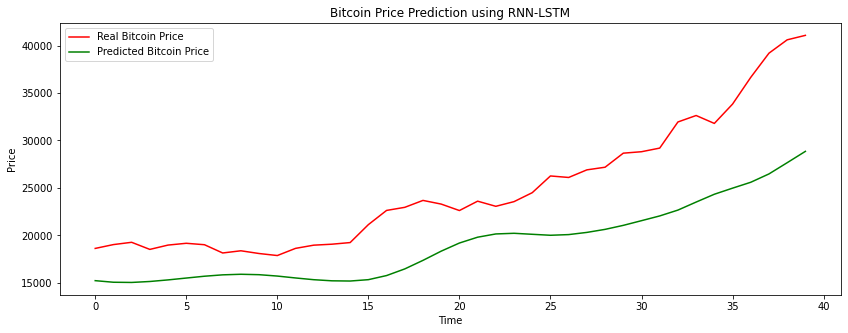

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()